Let's compare LSTM model and buy&hold strategy on S&P500

Imports and params

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller

start_date = '2015-01-01'
end_date = None

assets = {}

In [21]:
sp500 = yf.download("^GSPC", start = start_date)

C:\Users\Maksym\AppData\Local\Temp\ipykernel_19344\1670026411.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start = start_date)
[*********************100%***********************]  1 of 1 completed


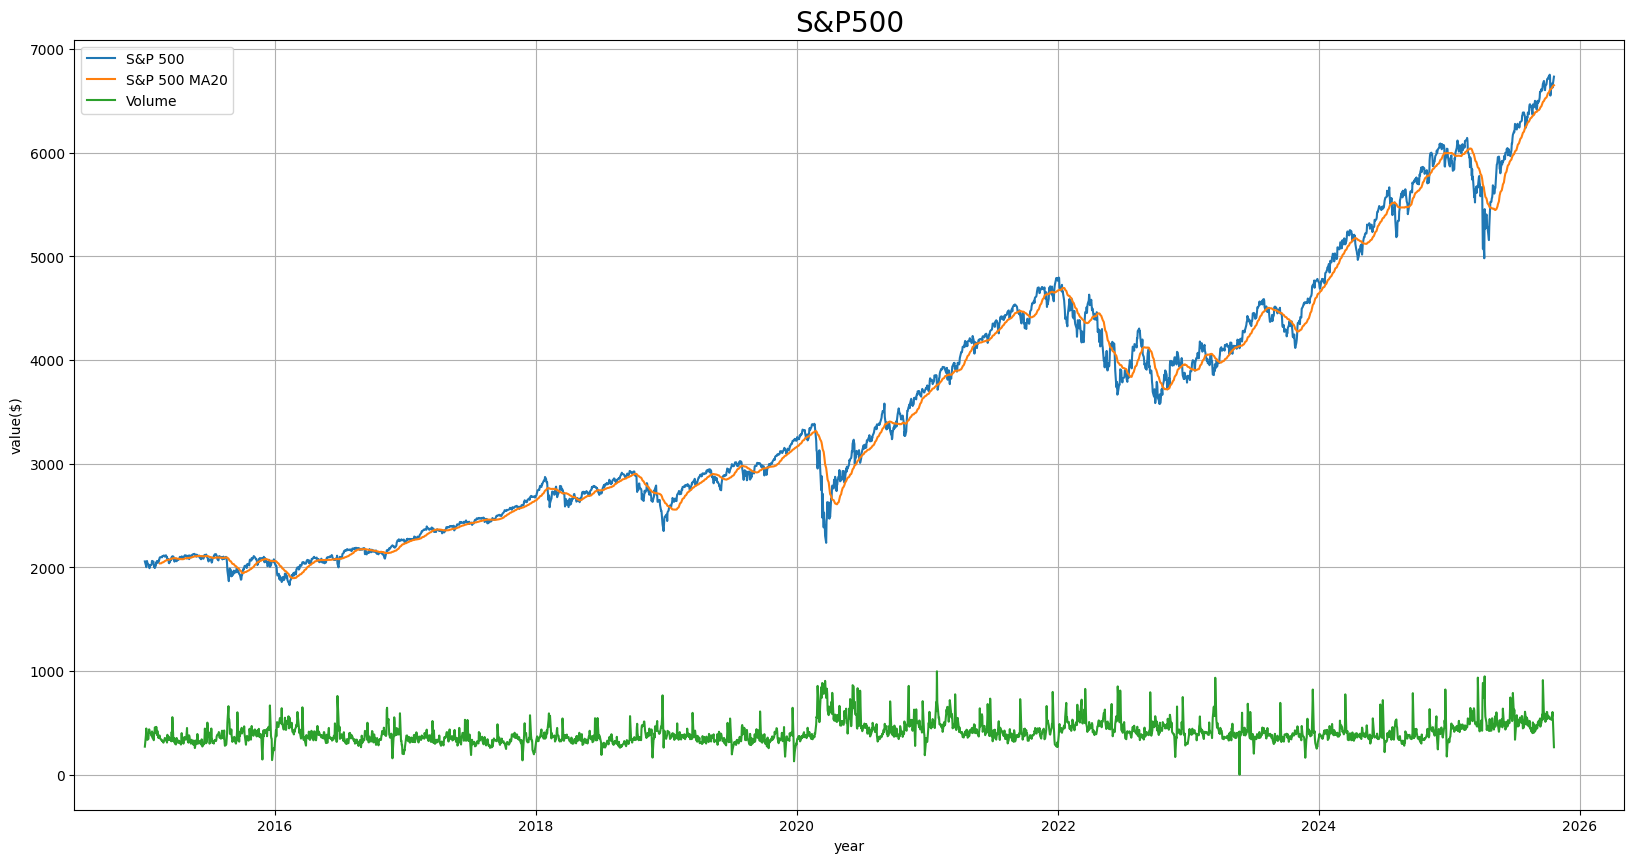

In [44]:
plt.figure(figsize=(20,10))

plt.plot(sp500["Close"], label="S&P 500")
plt.plot(sp500["Close"].rolling(30).mean(), label="S&P 500 MA20")
plt.plot(sp500["Volume"]/1e7, label="Volume")
plt.title("S&P500", size=20)
plt.xlabel("year")
plt.ylabel("value($)")
plt.grid(True)
plt.legend()

plt.show()

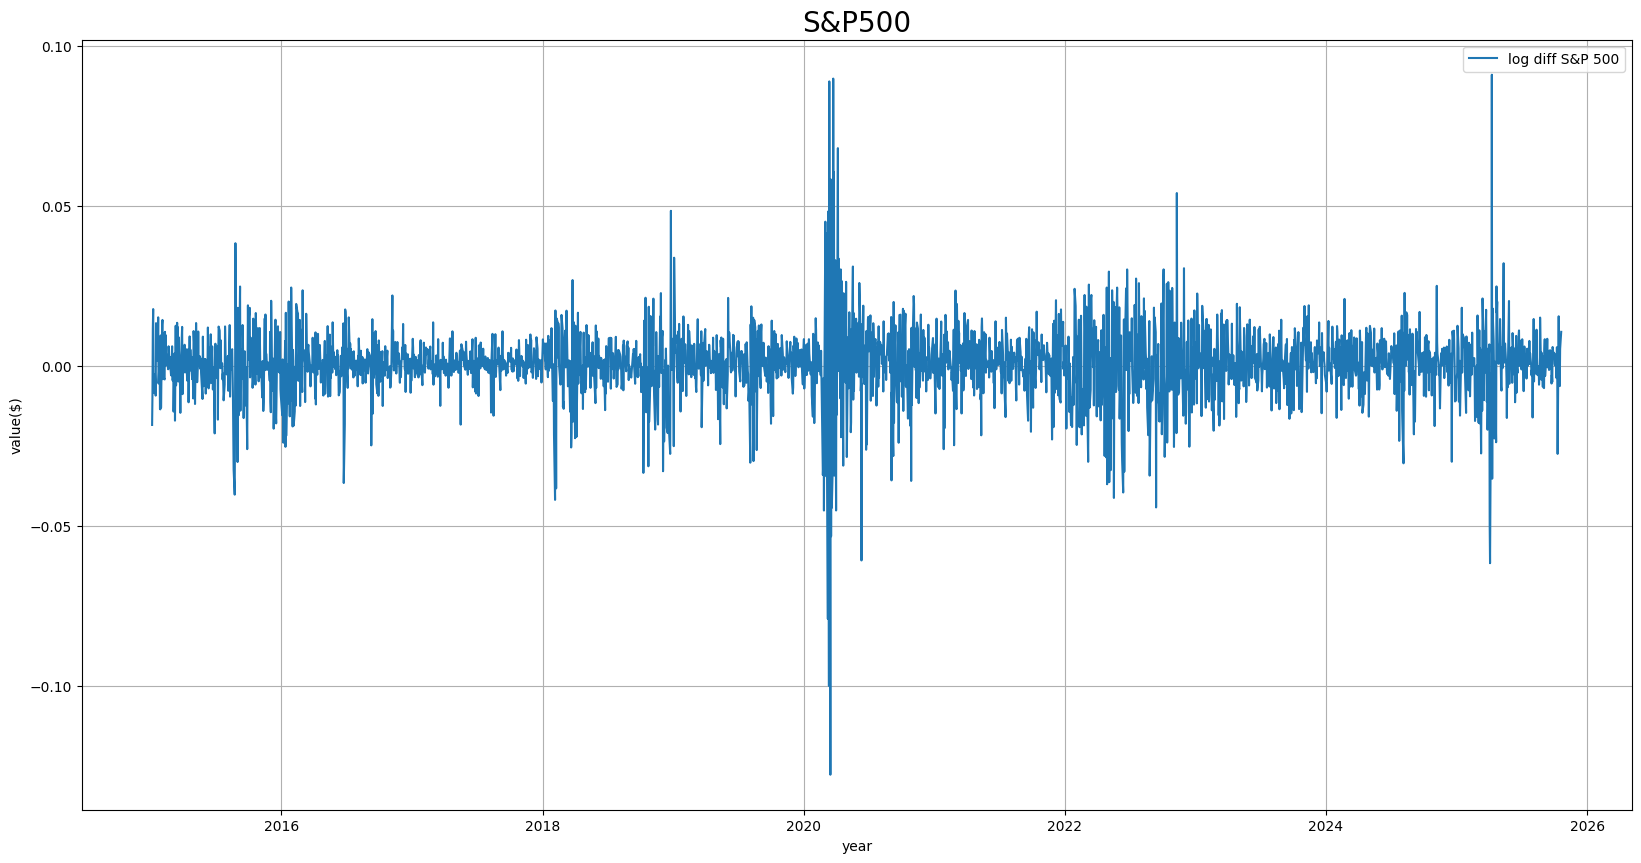

In [59]:
plt.figure(figsize=(20,10))

plt.plot(np.log1p(sp500['Close'].pct_change()), label="log diff S&P 500")
plt.title("S&P500", size=20)
plt.xlabel("year")
plt.ylabel("value($)")
plt.grid(True)
plt.legend()

plt.show()

Let's check this log diff series 

In [71]:
data = (np.log1p(sp500['Close'].pct_change()))[1:]
result = adfuller(data,autolag='AIC')

print('ADF test')
print('ADF stat:', result[0])
print('p-value:', result[1])
print('num of lags:', result[2])
print('num of observations:', result[3])
print('critical value:', result[4])

ADF test
ADF stat: -16.756640230937133
p-value: 1.3204944918765727e-29
num of lags: 8
num of observations: 2706
critical value: {'1%': -3.432768889172182, '5%': -2.8626086881519686, '10%': -2.567338898027924}


the series is stationary :(

In [85]:
max(data["^GSPC"])

0.09089487983303646

c:\Users\Maksym\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


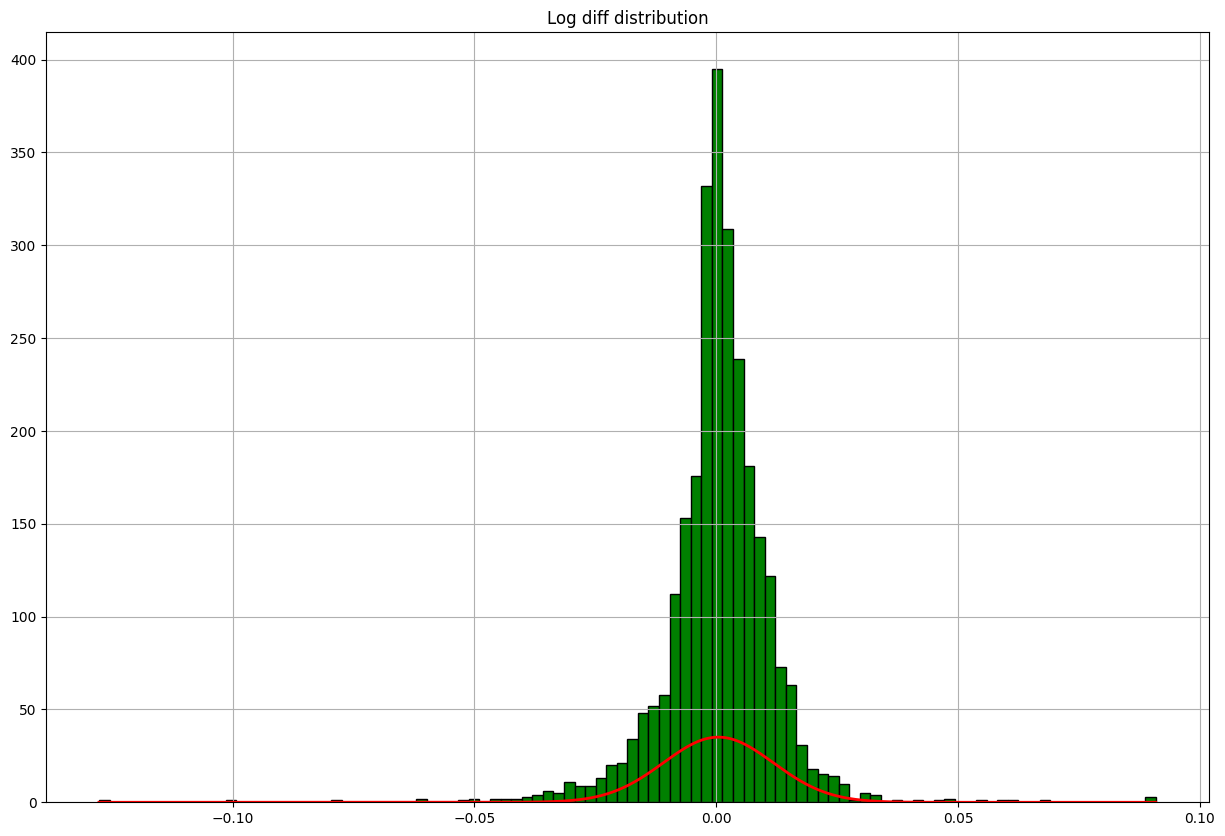

In [86]:
plt.figure(figsize=(15,10))
plt.hist(data, bins = 100, color ='green', edgecolor='black')

x = np.linspace(min(data["^GSPC"]), max(data["^GSPC"]), 1000)
pdf = norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, pdf, 'r-', linewidth=2, label='Krzywa gęstości (PDF)')

plt.title("Log diff distribution")
plt.grid(True)

In [87]:
from scipy import stats

stat_shapiro, p_shapiro = stats.shapiro(data)
print("Shapiro–Wilk test:")
print(f"  statistics: {stat_shapiro:.4f}, p-value: {p_shapiro:.4f}")

Shapiro–Wilk test:
  statistics: 0.8708, p-value: 0.0000


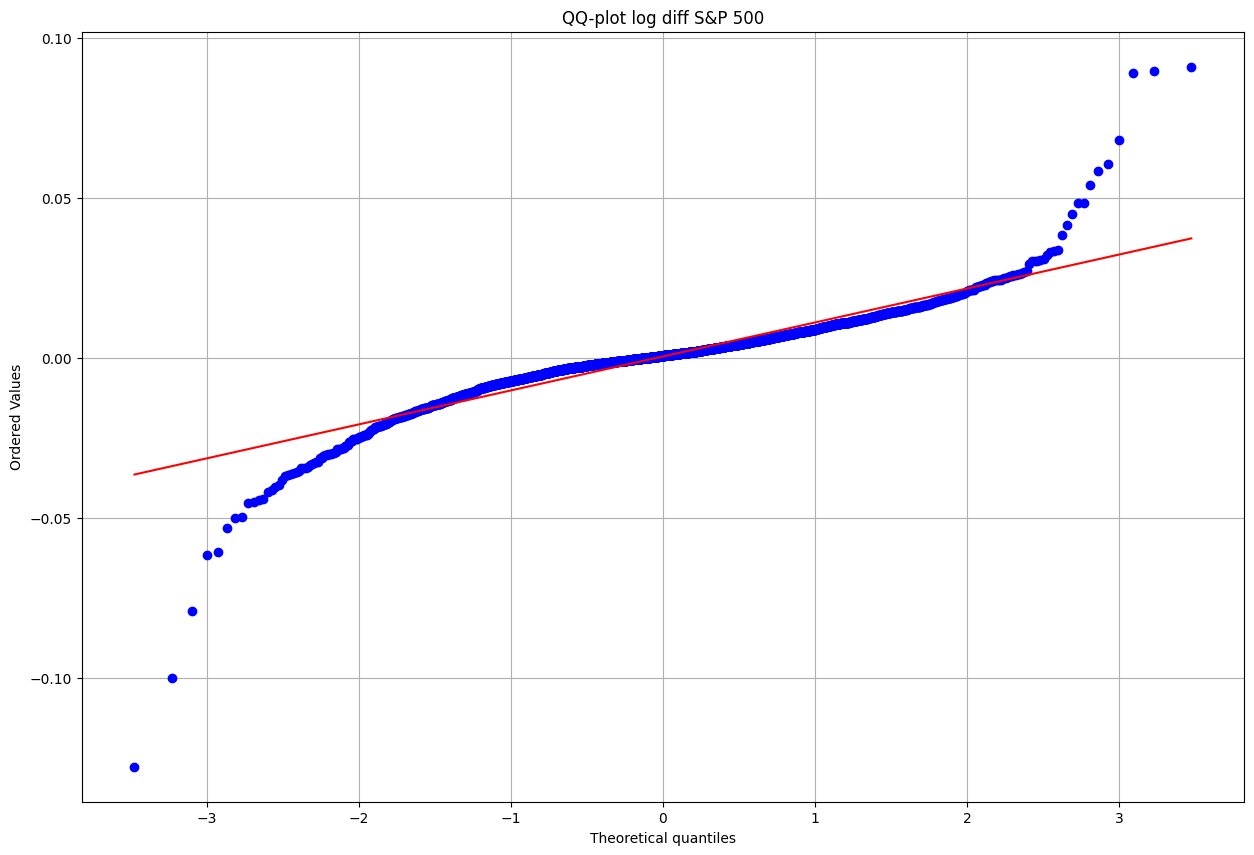

In [113]:
plt.figure(figsize=(15, 10))
stats.probplot(data["^GSPC"].to_numpy(), dist="norm", plot = plt)

plt.title("QQ-plot log diff S&P 500")
plt.grid(True)
plt.show()

result : def not normal

In [110]:
from scipy.stats import kstest, t

df, loc, scale = t.fit(data)

stat, p = kstest(data, 't', args=(df, loc, scale))
stat, p


(array([0.024522]), array([0.07512225]))

result : maybe t-student

In [116]:
sp500["Close"]

Ticker,^GSPC
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2025-10-14,6644.310059
2025-10-15,6671.060059
2025-10-16,6629.069824
